$\textbf{PROGRAMMING ASSIGNMENT}$
---


Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


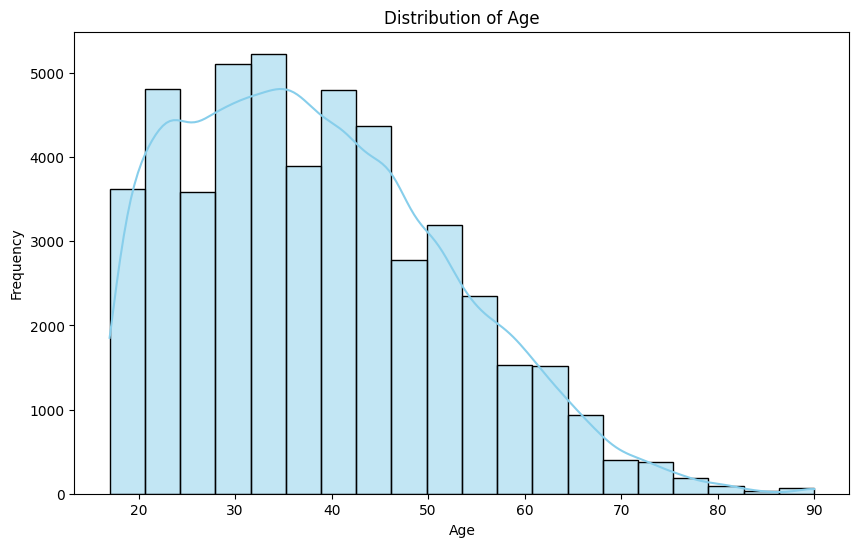

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


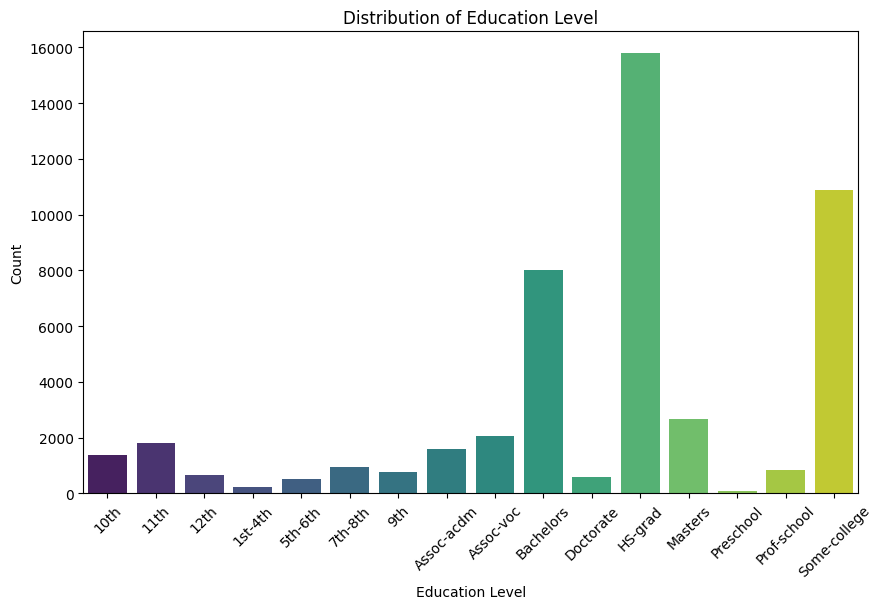

c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


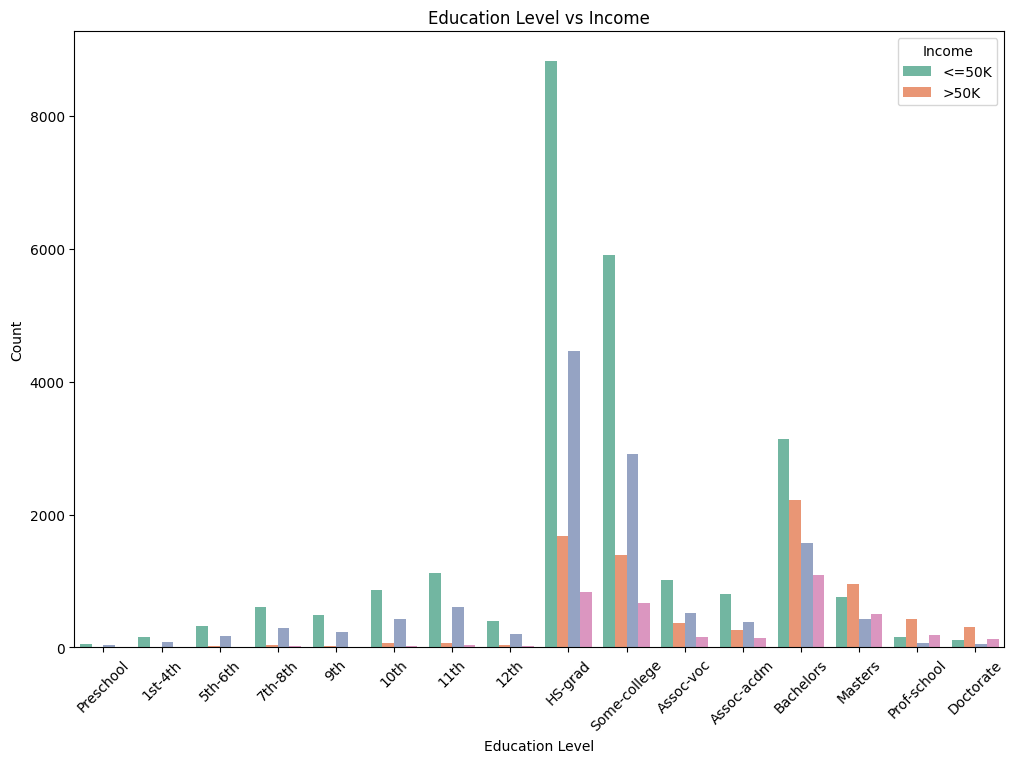

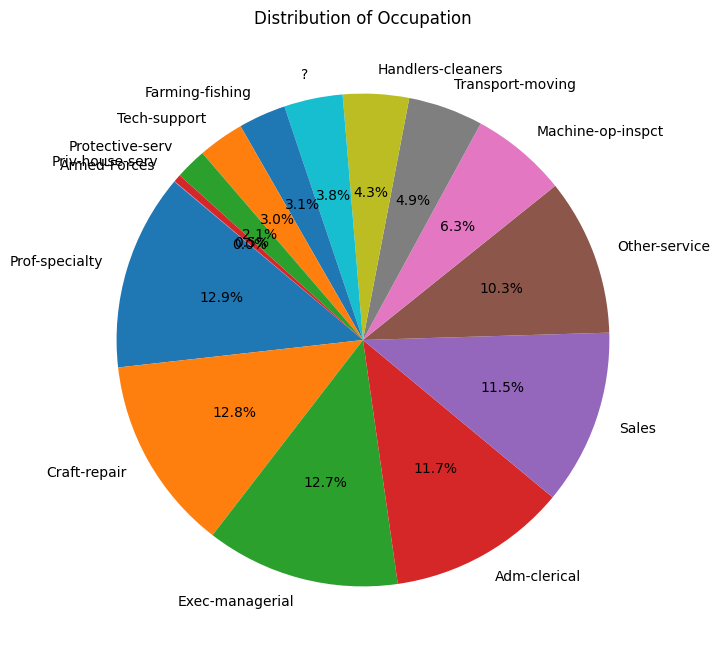

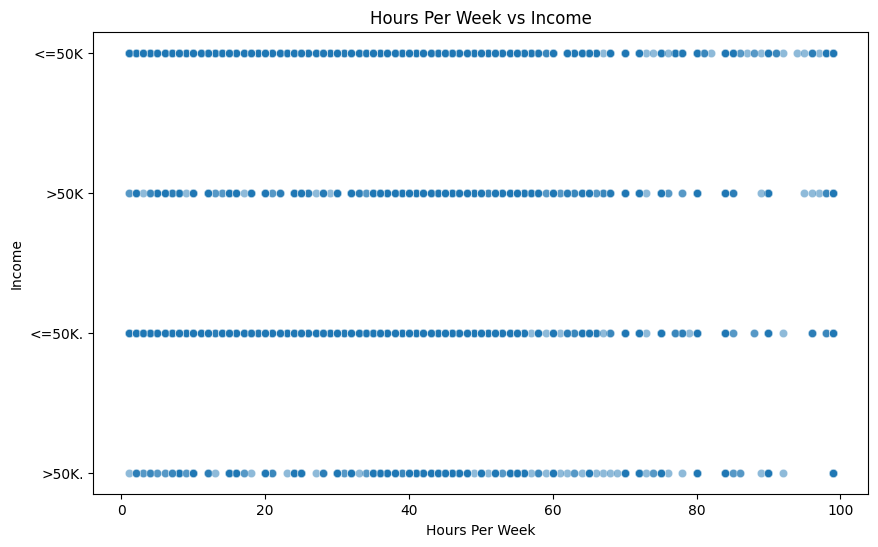

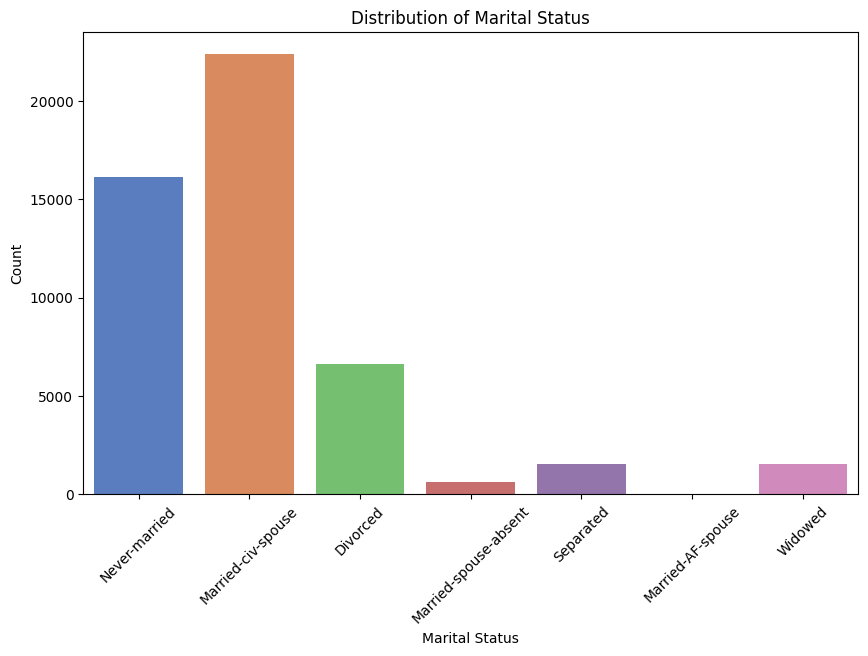

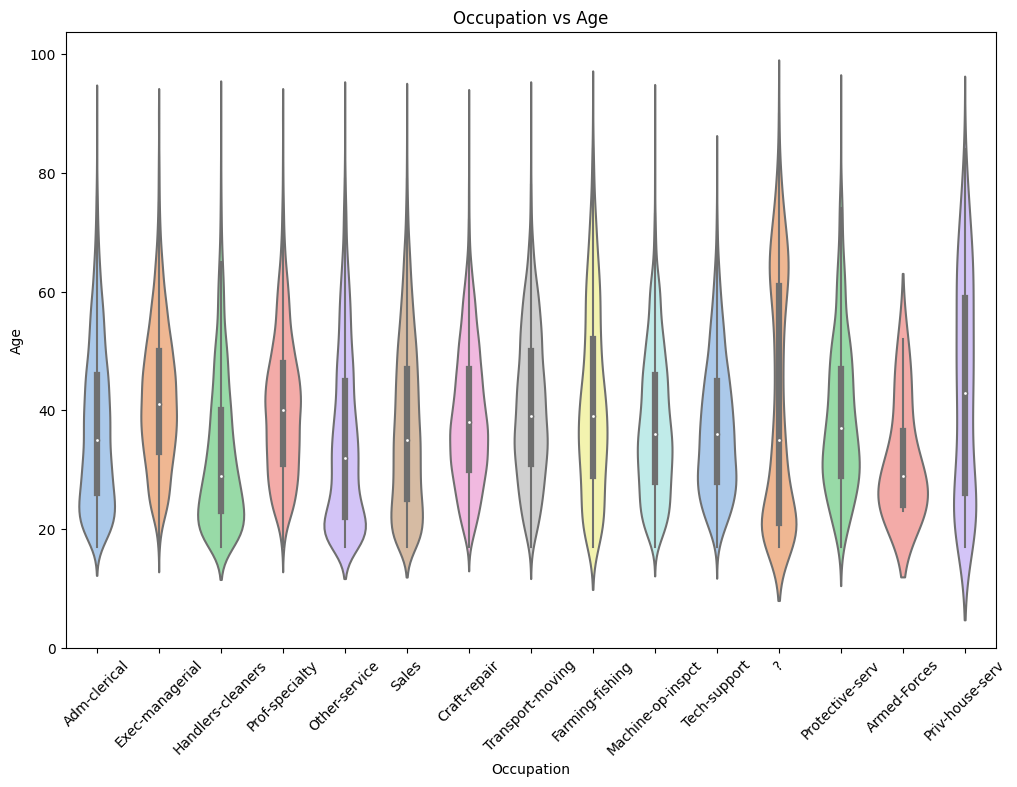

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(X['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=X, palette='viridis')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Add the 'income' column to the DataFrame X
X['income'] = y

# Map binary income values to categorical values for better visualization
income_mapping = {0: '<=50K', 1: '>50K'}
X['income_category'] = X['income'].map(income_mapping)

# Specify the order of education levels for proper plotting
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', 
    '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 
    'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate'
]

# Plot the relationship between education and income
plt.figure(figsize=(12, 8))
sns.countplot(x='education', hue='income', data=X, palette='Set2', order=education_order)
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

# Plot the distribution of occupation
plt.figure(figsize=(12, 8))
occupation_counts = X['occupation'].value_counts()
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Occupation')
plt.show()

# Flatten the 'y' array to ensure it is 1D
y_flat = np.ravel(y)

# Plot the relationship between hours-per-week and income
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['hours-per-week'], y=y_flat, alpha=0.5)
plt.title('Hours Per Week vs Income')
plt.xlabel('Hours Per Week')
plt.ylabel('Income')
plt.show()

# Plot the distribution of marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', data=X, palette='muted')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the relationship between occupation and age
plt.figure(figsize=(12, 8))
sns.violinplot(x='occupation', y='age', data=X, palette='pastel')
plt.title('Occupation vs Age')
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Count the occurrences of each unique value in the 'income' column
income_counts = X['income'].value_counts()

# Print the counts
print("Income Counts:")
print(income_counts)



Income Counts:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64
